K means is clustering algorithm.
k is parameter , centre of cluster. Ex. k=2

start with random k , then compute SSE(sum of squared error for each cluster), then find total SSE. Draw plot.
as you increase number of clusters , error will be less.

Find the elbow in plot, and that number is your good k.

K means used in 
1. Market segmentation
2. Image compression
3. Anomaly detection
4. Document clustering 
5. Recommendation System 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


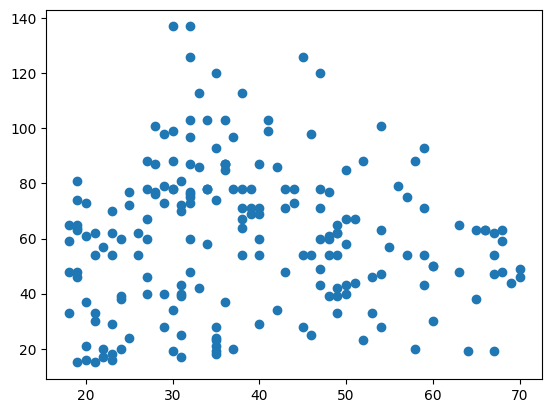

In [19]:
plt.scatter(df['Age'],df['Annual Income (k$)'])

In [20]:
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
%matplotlib inline

In [21]:
km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [22]:
y_pred = km.fit_predict(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
y_pred

array([1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 1,
       4, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1,
       1, 4, 4, 1, 4, 4, 4, 1, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4,
       4, 1, 4, 1, 1, 1, 4, 4, 4, 4, 2, 4, 2, 0, 3, 2, 3, 0, 3, 2, 3, 2,
       3, 2, 3, 0, 3, 2, 3, 2, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2,
       3, 0, 3, 2, 3, 2, 3, 0, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 0, 3, 0,
       3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2,
       3, 2])

In [23]:
df['cluster'] = y_pred
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [24]:
km.cluster_centers_

array([[32.95      , 84.95      , 90.2       ],
       [25.01923077, 40.23076923, 62.75      ],
       [32.52380952, 86.28571429, 72.04761905],
       [40.39473684, 87.        , 18.63157895],
       [52.05797101, 46.42028986, 39.88405797]])

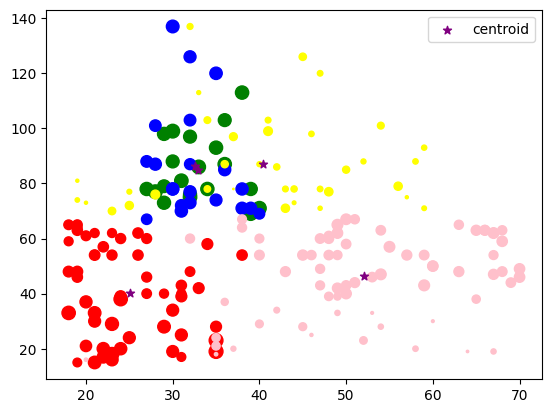

In [25]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.scatter(df1['Age'],df1['Annual Income (k$)'],df1['Spending Score (1-100)'], color='green')
plt.scatter(df2['Age'],df2['Annual Income (k$)'],df2['Spending Score (1-100)'], color='red')
plt.scatter(df3['Age'],df3['Annual Income (k$)'],df3['Spending Score (1-100)'], color='blue')
plt.scatter(df4['Age'],df4['Annual Income (k$)'],df4['Spending Score (1-100)'], color='yellow')
plt.scatter(df5['Age'],df5['Annual Income (k$)'],df5['Spending Score (1-100)'], color='pink')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color= 'purple',marker='*',label='centroid')
plt.legend()

In [26]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

In [27]:
sse

[308812.78,
 219892.98066605936,
 154578.69843995018,
 104366.15145556198,
 75350.77917248776,
 58336.739392796364,
 51530.369165746524,
 50842.55370800711,
 40922.59381207722]

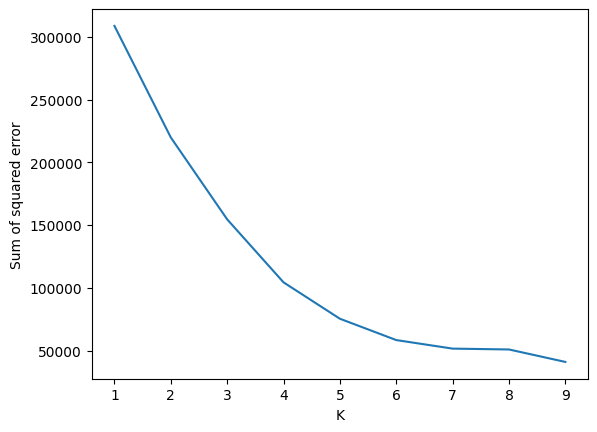

In [28]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)